# Ekstraksi data

In [1]:
# Install library yang diperlukan
!pip install tensorflow
!pip install pandas

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [3]:
# Path ke folder dataset gambar
dataset_path = r'C:\Users\syari\Downloads\AutoLabelling.v1i.tensorflow\krbai'
# Mendapatkan daftar file gambar dalam folder
image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

In [4]:
# Menggunakan model VGG16 yang telah dilatih sebelumnya
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

In [5]:
# Membuat list untuk menyimpan fitur ekstraksi
features = []

In [6]:
# Fungsi untuk ekstraksi fitur dari satu gambar
def extract_feature(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    feature = model.predict(img_array)
    return feature.flatten()

# Loop melalui setiap file gambar dan ekstrak fiturnya
features = [extract_feature(os.path.join(dataset_path, img_file), model) for img_file in image_files]

# Membuat DataFrame dari fitur dan menyimpannya ke file CSV
feature_df = pd.DataFrame(features)
feature_df.to_csv('C:\\Users\\syari\\Downloads\\AutoLabelling.v1i.tensorflow\\features.csv', index=False)

1/1 [==============================] - 0s 175ms/step


In [7]:
from IPython.display import display

# Menampilkan DataFrame
display(feature_df.head())


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,3.803360,1.670725,2.154248,0.480186,4.254868,1.166256,0.000000,3.164634,1.610700,0.000000,...,0.0,0.0,1.583905,0.000000,0.0,0.555804,1.172505,0.000000,0.481049,1.248541
1,2.235913,0.848269,2.181732,0.000000,5.545067,0.000000,0.584975,2.318148,0.421820,0.160287,...,0.0,0.0,0.735253,0.000000,0.0,0.680890,0.312764,1.076174,0.000000,0.859841
2,0.773962,0.000000,1.379871,0.000000,5.219187,0.000000,0.000000,3.248499,0.679701,1.343252,...,0.0,0.0,3.337271,0.000000,0.0,0.295121,0.000000,0.401279,0.000000,0.962276
3,0.000000,0.000000,0.616302,0.000000,0.000000,0.000000,2.502772,0.000000,0.000000,0.000000,...,0.0,0.0,7.847287,0.509928,0.0,3.017466,0.000000,0.000000,0.000000,0.000000
4,3.420971,4.345390,0.665118,0.000000,4.827015,0.000000,0.571759,1.675354,0.000000,0.000000,...,0.0,0.0,1.376633,0.000000,0.0,1.627841,1.656264,1.297888,0.000000,1.465916


# PCA


In [8]:
# Install library yang diperlukan
!pip install scikit-learn
from sklearn.decomposition import PCA

In [9]:
# Load data fitur ekstraksi dari file CSV
feature_df = pd.read_csv(r'C:\\Users\\syari\\Downloads\\AutoLabelling.v1i.tensorflow\\features.csv')

# Menentukan jumlah komponen PCA yang diinginkan
n_components = 25  # Ubah sesuai kebutuhan

In [10]:
# Menerapkan PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(feature_df)

# Menyimpan hasil PCA ke dalam file CSV
pca_df = pd.DataFrame(data=pca_result, columns=[f'pca_{i}' for i in range(n_components)])
pca_df.to_csv('C:\\Users\\syari\\Downloads\\AutoLabelling.v1i.tensorflow\\pca.csv', index=False)


Head of PCA DataFrame:


,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24
0,-16.218628,-10.451423,7.636991,17.848165,-3.827081,21.072326,1.634614,-13.154329,-0.364044,7.755753,...,2.941574,12.149217,1.927272,3.365510,-4.658624,-2.551749,-1.769514,-6.531428,-2.406469,-4.793533
1,5.372805,-13.436452,-8.093172,14.336746,-0.434545,13.356403,-4.017717,3.452288,0.885092,8.671385,...,9.494837,-0.747565,0.149310,-0.438878,-1.331832,-6.835982,-6.109507,-5.399280,-3.405907,-0.527511
2,5.127841,-11.568508,-11.770117,11.765187,9.913949,17.822295,-7.027240,-5.872718,-5.898286,3.893831,...,7.714375,-0.339527,6.403869,1.631201,-4.459712,-2.791734,-6.483018,-3.952445,-3.691427,3.383241
3,9.511134,-17.131331,-26.024224,-0.032667,37.488555,-0.589143,-3.241546,11.916475,-0.459687,-15.626785,...,-14.942974,-2.574987,-2.470775,7.466466,-4.750818,3.952863,1.690666,11.200442,4.518836,-5.177473
4,-25.139114,-16.721996,-4.502600,10.819515,-10.670231,-8.772150,-4.506378,-4.470431,-1.430832,8.373102,...,2.754099,-3.361457,1.463657,6.469407,-3.275860,1.146090,-5.695183,5.287268,2.338667,-0.214599


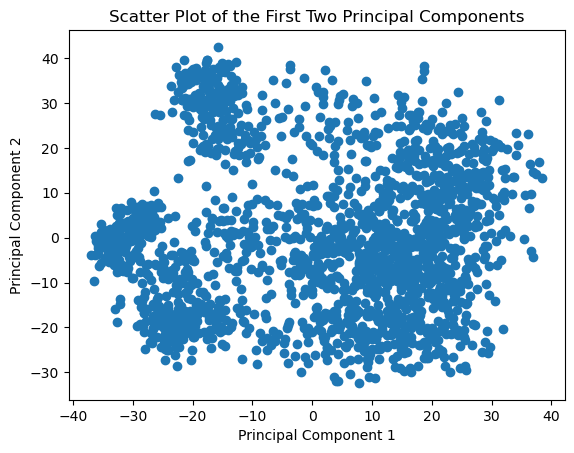

In [11]:
# Display a portion of the PCA dataframe
print("Head of PCA DataFrame:")
display(pca_df.head())

# You can also visualize the first two principal components
plt.scatter(pca_df['pca_0'], pca_df['pca_1'])
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Cross Validation


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

# Load hasil PCA dari file CSV
pca_df = pd.read_csv(r'C:\\Users\\syari\\Downloads\\AutoLabelling.v1i.tensorflow\\pca.csv')

# Load label atau target dari dataset
label_df = pd.read_csv(r'C:\\Users\\syari\\Downloads\\AutoLabelling.v1i.tensorflow\\pca_label.csv')

# Encoding labels
label_encoder = LabelEncoder()
label_df['label'] = label_encoder.fit_transform(label_df['label'])

# Gabungkan hasil PCA dengan label
data = pd.concat([pca_df, label_df], axis=1)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size=0.2, random_state=42)

# Menyesuaikan bentuk input untuk model CNN
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# List untuk menyimpan skor validasi dari setiap lipatan
cv_scores = []

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# CNN


Epoch 1/20
86/86 [==============================] - 2s 6ms/step - loss: 1.0927 - accuracy: 0.5316 - val_loss: 0.8922 - val_accuracy: 0.5239
Epoch 2/20
86/86 [==============================] - 0s 4ms/step - loss: 0.8721 - accuracy: 0.5738 - val_loss: 0.8807 - val_accuracy: 0.5225
Epoch 3/20
86/86 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.5948 - val_loss: 0.9074 - val_accuracy: 0.4790
Epoch 4/20
86/86 [==============================] - 0s 3ms/step - loss: 0.8336 - accuracy: 0.5850 - val_loss: 0.9178 - val_accuracy: 0.6038
Epoch 5/20
86/86 [==============================] - 0s 3ms/step - loss: 0.8083 - accuracy: 0.5865 - val_loss: 0.8378 - val_accuracy: 0.5718
Epoch 6/20
86/86 [==============================] - 0s 3ms/step - loss: 0.7945 - accuracy: 0.6039 - val_loss: 0.8480 - val_accuracy: 0.5370
Epoch 7/20
86/86 [==============================] - 0s 3ms/step - loss: 0.7922 - accuracy: 0.5963 - val_loss: 0.8475 - val_accuracy: 0.5965
Epoch 8/20
86/86 [==

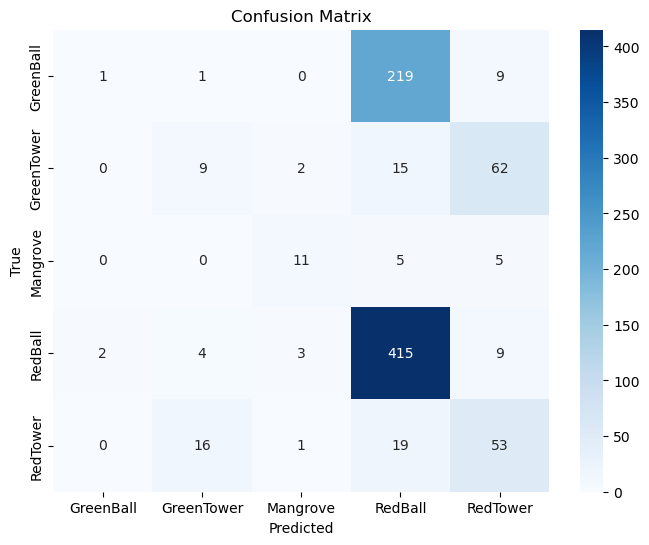

Classification Report:
              precision    recall  f1-score   support

   GreenBall       0.33      0.00      0.01       230
  GreenTower       0.30      0.10      0.15        88
    Mangrove       0.65      0.52      0.58        21
     RedBall       0.62      0.96      0.75       433
    RedTower       0.38      0.60      0.47        89

    accuracy                           0.57       861
   macro avg       0.46      0.44      0.39       861
weighted avg       0.49      0.57      0.46       861



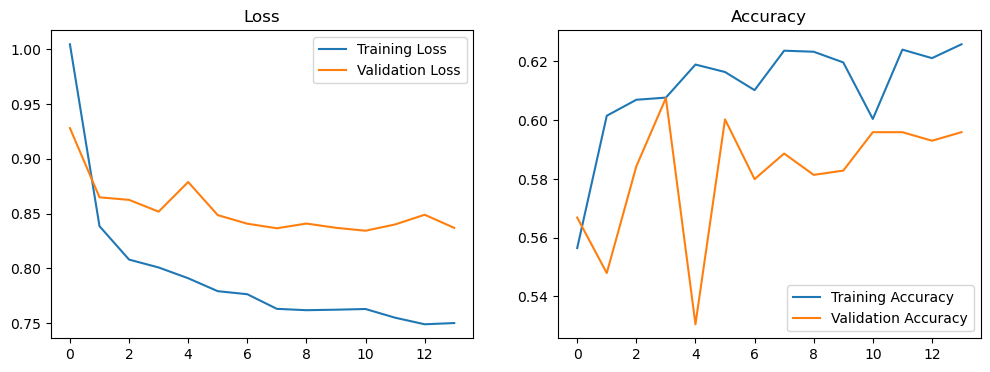

Average Cross-Validation Accuracy: 56.54%


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax activation for multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model using cross-validation
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = create_cnn_model((X_train_fold.shape[1], 1))
    
    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # Train the model with early stopping callback
    history = model.fit(X_train_fold, y_train_fold, epochs=20, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluate the model on the test set
    scores = model.evaluate(X_test, y_test)

    # Store the cross-validation score
    cv_scores.append(scores[1])

# Display confusion matrix for the last fold as an image
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display confusion matrix as an image
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
cr = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:")
print(cr)

# Plot training history (loss and accuracy) for the last fold
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Average cross-validation accuracy
average_accuracy = np.mean(cv_scores)
print(f'Average Cross-Validation Accuracy: {average_accuracy*100:.2f}%')

